In [1]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import sklearn 
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)
import tensorflow as tf
import keras as k

Using TensorFlow backend.


In [3]:
fashion=pd.read_csv(r"fashion-mnist_train.csv")
fashion.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,pixel39,pixel40,pixel41,pixel42,pixel43,pixel44,pixel45,pixel46,pixel47,pixel48,pixel49,pixel50,pixel51,pixel52,pixel53,pixel54,pixel55,pixel56,pixel57,pixel58,pixel59,pixel60,pixel61,pixel62,pixel63,pixel64,pixel65,pixel66,pixel67,pixel68,pixel69,pixel70,pixel71,pixel72,pixel73,pixel74,pixel75,pixel76,pixel77,pixel78,pixel79,pixel80,pixel81,pixel82,pixel83,pixel84,pixel85,pixel86,pixel87,pixel88,pixel89,pixel90,pixel91,pixel92,pixel93,pixel94,pixel95,pixel96,pixel97,pixel98,pixel99,pixel100,pixel101,pixel102,pixel103,pixel104,pixel105,pixel106,pixel107,pixel108,pixel109,pixel110,pixel111,pixel112,pixel113,pixel114,pixel115,pixel116,pixel117,pixel118,pixel119,pixel120,pixel121,pixel122,pixel123,pixel124,pixel125,pixel126,pixel127,pixel128,pixel129,pixel130,pixel131,pixel132,pixel133,pixel134,pixel135,pixel136,pixel137,pixel138,pixel139,pixel140,pixel141,pixel142,pixel143,pixel144,pixel145,pixel146,pixel147,pixel148,pixel149,pixel150,pixel151,pixel152,pixel153,pixel154,pixel155,pixel156,pixel157,pixel158,pixel159,pixel160,pixel161,pixel162,pixel163,pixel164,pixel165,pixel166,pixel167,pixel168,pixel169,pixel170,pixel171,pixel172,pixel173,pixel174,pixel175,pixel176,pixel177,pixel178,pixel179,pixel180,pixel181,pixel182,pixel183,pixel184,pixel185,pixel186,pixel187,pixel188,pixel189,pixel190,pixel191,pixel192,pixel193,pixel194,pixel195,pixel196,pixel197,pixel198,pixel199,pixel200,pixel201,pixel202,pixel203,pixel204,pixel205,pixel206,pixel207,pixel208,pixel209,pixel210,pixel211,pixel212,pixel213,pixel214,pixel215,pixel216,pixel217,pixel218,pixel219,pixel220,pixel221,pixel222,pixel223,pixel224,pixel225,pixel226,pixel227,pixel228,pixel229,pixel230,pixel231,pixel232,pixel233,pixel234,pixel235,pixel236,pixel237,pixel238,pixel239,pixel240,pixel241,pixel242,pixel243,pixel244,pixel245,pixel246,pixel247,pixel248,pixel249,pixel250,pixel251,pixel252,pixel253,pixel254,pixel255,pixel256,pixel257,pixel258,pixel259,pixel260,pixel261,pixel262,pixel263,pixel264,pixel265,pixel266,pixel267,pixel268,pixel269,pixel270,pixel271,pixel272,pixel273,pixel274,pixel275,pixel276,pixel277,pixel278,pixel279,pixel280,pixel281,pixel282,pixel283,pixel284,pixel285,pixel286,pixel287,pixel288,pixel289,pixel290,pixel291,pixel292,pixel293,pixel294,pixel295,pixel296,pixel297,pixel298,pixel299,pixel300,pixel301,pixel302,pixel303,pixel304,pixel305,pixel306,pixel307,pixel308,pixel309,pixel310,pixel311,pixel312,pixel313,pixel314,pixel315,pixel316,pixel317,pixel318,pixel319,pixel320,pixel321,pixel322,pixel323,pixel324,pixel325,pixel326,pixel327,pixel328,pixel329,pixel330,pixel331,pixel332,pixel333,pixel334,pixel335,pixel336,pixel337,pixel338,pixel339,pixel340,pixel341,pixel342,pixel343,pixel344,pixel345,pixel346,pixel347,pixel348,pixel349,pixel350,pixel351,pixel352,pixel353,pixel354,pixel355,pixel356,pixel357,pixel358,pixel359,pixel360,pixel361,pixel362,pixel363,pixel364,pixel365,pixel366,pixel367,pixel368,pixel369,pixel370,pixel371,pixel372,pixel373,pixel374,pixel375,pixel376,pixel377,pixel378,pixel379,pixel380,pixel381,pixel382,pixel383,pixel384,pixel385,pixel386,pixel387,pixel388,pixel389,pixel390,pixel391,pixel392,pixel393,pixel394,pixel395,pixel396,pixel397,pixel398,pixel399,pixel400,pixel401,pixel402,pixel403,pixel404,pixel405,pixel406,pixel407,pixel408,pixel409,pixel410,pixel411,pixel412,pixel413,pixel414,pixel415,pixel416,pixel417,pixel418,pixel419,pixel420,pixel421,pixel422,pixel423,pixel424,pixel425,pixel426,pixel427,pixel428,pixel429,pixel430,pixel431,pixel432,pixel433,pixel434,pixel435,pixel436,pixel437,pixel438,pixel439,pixel440,pixel441,pixel442,pixel443,pixel444,pixel445,pixel446,pixel447,pixel448,pixel449,pixel450,pixel451,pixel452,pixel453,pixel454,pixel455,pixel4

In [4]:
fashion.shape

(60000, 785)

In [5]:
fashion.label.value_counts()

9    6000
8    6000
7    6000
6    6000
5    6000
4    6000
3    6000
2    6000
1    6000
0    6000
Name: label, dtype: int64

In [30]:
sen_col=fashion.iloc[10]   #selectinh 1st record

In [31]:
sen_col=sen_col.iloc[1:]   ##dropping the 1st column....as its a non numeric(dropping the target variable)

In [32]:
abc=np.array(sen_col)

In [33]:
abc=abc.reshape(28,28)

In [34]:
abc.shape

(28, 28)

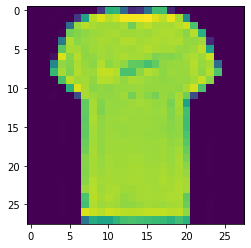

In [35]:
plt.imshow(abc)

In [20]:
fashion_x=fashion.iloc[:,1:]   #crating the x values
fashion_y=fashion.iloc[:,0] 

In [21]:
fashion_x_train,fashion_x_test,fashion_y_train,fashion_y_test=train_test_split(fashion_x,fashion_y,test_size=.2,random_state=555)

In [22]:
print(fashion_x_train.shape)
print(fashion_y_train.shape)
print(fashion_x_test.shape)
print(fashion_y_test.shape)

(48000, 784)
(48000,)
(12000, 784)
(12000,)


In [23]:
fashion_x_train=np.array(fashion_x_train)
fashion_x_test=np.array(fashion_x_test)    #mandatory step---converting into array

In [24]:
for i in range(len(fashion_x_train)):
    fashion_x_train[i].reshape(28,28)

In [25]:
for i in range(len(fashion_x_test)):
    fashion_x_test[i].reshape(28,28)

In [26]:
fashion_x_train=tf.keras.utils.normalize(fashion_x_train)
fashion_x_test=tf.keras.utils.normalize(fashion_x_test)

##normalize the data........for better performance

### lets build the neural network

In [ ]:

model=tf.keras.models.Sequential()  #initialize the network
model.add(tf.keras.layers.Dense(128,activation=tf.nn.relu))  #1st hidden layer with 128 neuron and activation relu
model.add(tf.keras.layers.Dense(128,activation=tf.nn.relu)) #2nd hidden layer with 128 neuron and activation relu
model.add(tf.keras.layers.Dense(128,activation=tf.nn.relu)) #3rd hidden layer with 128 neuron and activation relu
model.add(tf.keras.layers.Dense(10,activation=tf.nn.softmax)) #output layer use softmax function instead of relu

adam=tf.keras.optimizers.Adam(lr=0.001)

model.compile(optimizer=adam,loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [28]:
fashion_y_train=np.array(fashion_y_train)

In [29]:
model.fit(fashion_x_train,fashion_y_train,batch_size=64,epochs=50,validation_split=0.2)

Train on 38400 samples, validate on 9600 samples
Epoch 1/50
38400/38400 [==============================] - 3s 83us/sample - loss: 0.6476 - acc: 0.7618 - val_loss: 0.4686 - val_acc: 0.8364
Epoch 2/50
38400/38400 [==============================] - 4s 94us/sample - loss: 0.4255 - acc: 0.8433 - val_loss: 0.3987 - val_acc: 0.8568
Epoch 3/50
38400/38400 [==============================] - 3s 90us/sample - loss: 0.3791 - acc: 0.8605 - val_loss: 0.3892 - val_acc: 0.8569
Epoch 4/50
38400/38400 [==============================] - 4s 104us/sample - loss: 0.3511 - acc: 0.8704 - val_loss: 0.3800 - val_acc: 0.8576
Epoch 5/50
38400/38400 [==============================] - 3s 88us/sample - loss: 0.3337 - acc: 0.8777 - val_loss: 0.3630 - val_acc: 0.8667
Epoch 6/50
38400/38400 [==============================] - 3s 68us/sample - loss: 0.3089 - acc: 0.8850 - val_loss: 0.3393 - val_acc: 0.8780
Epoch 7/50
38400/38400 [==============================] - 4s 96us/sample - loss: 0.2970 - acc: 0.8901 - val_loss: 0.

In [30]:
model.predict_classes(fashion_x_test)

array([1, 7, 3, ..., 9, 1, 9], dtype=int64)

In [31]:
tab1=confusion_matrix(model.predict_classes(fashion_x_test), fashion_y_test)
tab1

array([[ 993,    8,   20,   42,    3,    1,  150,    0,    5,    1],
       [   6, 1200,    1,   11,    3,    0,    1,    0,    0,    0],
       [  18,    3,  983,   14,   58,    2,  117,    0,    5,    0],
       [  24,   20,    7, 1071,   23,    1,   27,    0,    8,    0],
       [   6,    4,  162,   50, 1031,    0,  147,    0,    6,    0],
       [   1,    1,    0,    0,    0, 1135,    0,   15,    2,   10],
       [ 122,    4,   42,   37,   37,    0,  764,    0,    6,    0],
       [   0,    0,    0,    0,    0,   49,    0, 1080,    4,   43],
       [   8,    0,   11,    4,    5,    4,   17,    1, 1189,    1],
       [   0,    0,    0,    0,    0,   10,    0,   26,    0, 1140]],
      dtype=int64)

In [32]:
acc=tab1.diagonal().sum()* 100 / tab1.sum()
acc

88.21666666666667

In [33]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                multiple                  100480    
_________________________________________________________________
dense_1 (Dense)              multiple                  16512     
_________________________________________________________________
dense_2 (Dense)              multiple                  16512     
_________________________________________________________________
dense_3 (Dense)              multiple                  1290      
Total params: 134,794
Trainable params: 134,794
Non-trainable params: 0
_________________________________________________________________


### CNN model

In [6]:
fashion=pd.read_csv(r"fashion-mnist_train.csv")
fashion.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,pixel39,pixel40,pixel41,pixel42,pixel43,pixel44,pixel45,pixel46,pixel47,pixel48,pixel49,pixel50,pixel51,pixel52,pixel53,pixel54,pixel55,pixel56,pixel57,pixel58,pixel59,pixel60,pixel61,pixel62,pixel63,pixel64,pixel65,pixel66,pixel67,pixel68,pixel69,pixel70,pixel71,pixel72,pixel73,pixel74,pixel75,pixel76,pixel77,pixel78,pixel79,pixel80,pixel81,pixel82,pixel83,pixel84,pixel85,pixel86,pixel87,pixel88,pixel89,pixel90,pixel91,pixel92,pixel93,pixel94,pixel95,pixel96,pixel97,pixel98,pixel99,pixel100,pixel101,pixel102,pixel103,pixel104,pixel105,pixel106,pixel107,pixel108,pixel109,pixel110,pixel111,pixel112,pixel113,pixel114,pixel115,pixel116,pixel117,pixel118,pixel119,pixel120,pixel121,pixel122,pixel123,pixel124,pixel125,pixel126,pixel127,pixel128,pixel129,pixel130,pixel131,pixel132,pixel133,pixel134,pixel135,pixel136,pixel137,pixel138,pixel139,pixel140,pixel141,pixel142,pixel143,pixel144,pixel145,pixel146,pixel147,pixel148,pixel149,pixel150,pixel151,pixel152,pixel153,pixel154,pixel155,pixel156,pixel157,pixel158,pixel159,pixel160,pixel161,pixel162,pixel163,pixel164,pixel165,pixel166,pixel167,pixel168,pixel169,pixel170,pixel171,pixel172,pixel173,pixel174,pixel175,pixel176,pixel177,pixel178,pixel179,pixel180,pixel181,pixel182,pixel183,pixel184,pixel185,pixel186,pixel187,pixel188,pixel189,pixel190,pixel191,pixel192,pixel193,pixel194,pixel195,pixel196,pixel197,pixel198,pixel199,pixel200,pixel201,pixel202,pixel203,pixel204,pixel205,pixel206,pixel207,pixel208,pixel209,pixel210,pixel211,pixel212,pixel213,pixel214,pixel215,pixel216,pixel217,pixel218,pixel219,pixel220,pixel221,pixel222,pixel223,pixel224,pixel225,pixel226,pixel227,pixel228,pixel229,pixel230,pixel231,pixel232,pixel233,pixel234,pixel235,pixel236,pixel237,pixel238,pixel239,pixel240,pixel241,pixel242,pixel243,pixel244,pixel245,pixel246,pixel247,pixel248,pixel249,pixel250,pixel251,pixel252,pixel253,pixel254,pixel255,pixel256,pixel257,pixel258,pixel259,pixel260,pixel261,pixel262,pixel263,pixel264,pixel265,pixel266,pixel267,pixel268,pixel269,pixel270,pixel271,pixel272,pixel273,pixel274,pixel275,pixel276,pixel277,pixel278,pixel279,pixel280,pixel281,pixel282,pixel283,pixel284,pixel285,pixel286,pixel287,pixel288,pixel289,pixel290,pixel291,pixel292,pixel293,pixel294,pixel295,pixel296,pixel297,pixel298,pixel299,pixel300,pixel301,pixel302,pixel303,pixel304,pixel305,pixel306,pixel307,pixel308,pixel309,pixel310,pixel311,pixel312,pixel313,pixel314,pixel315,pixel316,pixel317,pixel318,pixel319,pixel320,pixel321,pixel322,pixel323,pixel324,pixel325,pixel326,pixel327,pixel328,pixel329,pixel330,pixel331,pixel332,pixel333,pixel334,pixel335,pixel336,pixel337,pixel338,pixel339,pixel340,pixel341,pixel342,pixel343,pixel344,pixel345,pixel346,pixel347,pixel348,pixel349,pixel350,pixel351,pixel352,pixel353,pixel354,pixel355,pixel356,pixel357,pixel358,pixel359,pixel360,pixel361,pixel362,pixel363,pixel364,pixel365,pixel366,pixel367,pixel368,pixel369,pixel370,pixel371,pixel372,pixel373,pixel374,pixel375,pixel376,pixel377,pixel378,pixel379,pixel380,pixel381,pixel382,pixel383,pixel384,pixel385,pixel386,pixel387,pixel388,pixel389,pixel390,pixel391,pixel392,pixel393,pixel394,pixel395,pixel396,pixel397,pixel398,pixel399,pixel400,pixel401,pixel402,pixel403,pixel404,pixel405,pixel406,pixel407,pixel408,pixel409,pixel410,pixel411,pixel412,pixel413,pixel414,pixel415,pixel416,pixel417,pixel418,pixel419,pixel420,pixel421,pixel422,pixel423,pixel424,pixel425,pixel426,pixel427,pixel428,pixel429,pixel430,pixel431,pixel432,pixel433,pixel434,pixel435,pixel436,pixel437,pixel438,pixel439,pixel440,pixel441,pixel442,pixel443,pixel444,pixel445,pixel446,pixel447,pixel448,pixel449,pixel450,pixel451,pixel452,pixel453,pixel454,pixel455,pixel4

In [7]:
fashion_x=fashion.iloc[:,1:]   #crating the x values
fashion_y=fashion.iloc[:,0]   

In [8]:
fashion_x=np.array(fashion_x)
fashion_y=np.array(fashion_y)  

In [9]:
fashion_x=fashion_x.reshape(-1,28,28,1)

In [10]:
fashion_x.shape

(60000, 28, 28, 1)

In [11]:
fashion_x=tf.keras.utils.normalize(fashion_x)
fashion_y=tf.keras.utils.to_categorical(fashion_y)

In [12]:
from keras.models import Sequential
from keras.layers import Conv2D , MaxPool2D , Flatten , Dense , Dropout
from keras.utils import to_categorical

In [13]:
model=Sequential()###1 layer of convolution followed by pooling
model.add(Conv2D(filters=16,kernel_size=(5,5),activation='relu',padding='same',input_shape=(28,28,1))) #creating 16 sliders 
model.add(MaxPool2D(pool_size=(2,2)))
###1 layer of convolution folled by pooling
model.add(Conv2D(filters=32,kernel_size=(5,5),activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(10,activation='softmax'))

In [14]:
adam=tf.keras.optimizers.Adam(lr=0.01)
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [15]:
model.fit(fashion_x,fashion_y,epochs=2,batch_size=128)


Epoch 1/2
60000/60000 [==============================] - 25s 411us/step - loss: 0.6440 - accuracy: 0.7616
Epoch 2/2
60000/60000 [==============================] - 25s 421us/step - loss: 0.4177 - accuracy: 0.8471


In [16]:
model.predict_classes(fashion_x)

array([6, 9, 6, ..., 8, 8, 7], dtype=int64)

In [17]:
fashion_y=fashion.iloc[:,0]

In [18]:
tab2=confusion_matrix(model.predict_classes(fashion_x),(fashion_y))
tab2

array([[5305,   17,   77,  187,    7,    1, 1253,    0,   22,    0],
       [   6, 5826,    1,   43,    9,    0,   10,    0,    4,    0],
       [  89,   11, 4690,   51,  514,    2,  611,    0,   29,    1],
       [ 171,  112,   40, 5353,  259,    1,  130,    0,   14,    3],
       [  14,   16,  806,  232, 4748,    0,  536,    0,   19,    0],
       [   2,    0,    1,    1,    0, 5781,    2,   47,   18,   36],
       [ 376,   15,  381,  127,  458,    0, 3423,    0,  123,    0],
       [   0,    0,    0,    0,    0,  171,    0, 5858,   18,  327],
       [  37,    3,    4,    6,    5,   12,   35,    9, 5752,    4],
       [   0,    0,    0,    0,    0,   32,    0,   86,    1, 5629]],
      dtype=int64)

In [19]:
acc2=tab2.diagonal().sum()* 100 / tab2.sum()
acc2

87.275